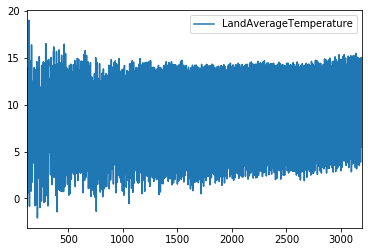

3072

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#dataseti çağırdık ve kullanmayacağımız satırları sildik
series = read_csv('GlobalTemperatures.csv', header=0)
series = series.iloc[120:]
series = series.drop(['LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],axis = 1)
#dataset grafiği oluşturduk
series.plot()
plt.show()
len(series)

In [94]:
series['dt'] =  pd.to_datetime(series['dt'], infer_datetime_format=True)

In [95]:
series

,dt,LandAverageTemperature
120,1760-01-01,-0.811
121,1760-02-01,2.436
122,1760-03-01,1.864
123,1760-04-01,7.436
124,1760-05-01,10.661
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [96]:
series["year"] = pd.DatetimeIndex(series['dt']).year

In [97]:
series = series.groupby("year").mean()

In [98]:
split_point = len(series) - 50
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
#dataset.to_csv('dataset.csv', index=False)
validation.round(3)
dataset.to_csv('dataset_year.csv', index=False)
validation.to_csv('validation_year.csv', index=False)

Dataset 206, Validation 50


In [99]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [100]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

series1 = read_csv('dataset_year.csv', header=None)
#X değişkeni tahmin edilecek veriler
X = series1.values
X = X[3:]
X = X.astype(np.float)
days_in_year = 12
differenced = difference(X, days_in_year)
#verilerimizi modele oturtuyoruz
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  192
Model:                     ARMA(7, 1)   Log Likelihood                -101.919
Method:                       css-mle   S.D. of innovations              0.410
Date:                Sat, 28 Dec 2019   AIC                            223.838
Time:                        05:50:12   BIC                            256.413
Sample:                             0   HQIC                           237.031
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0294      0.037      0.804      0.422      -0.042       0.101
ar.L1.y        1.3037      0.095     13.784      0.000       1.118       1.489
ar.L2.y       -0.3341      0.128     -2.614      0.0

In [101]:
forecast = model_fit.forecast()[0]
forecast

array([-0.09666769])

In [102]:
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 8.463999


In [103]:
forecast = model_fit.forecast(steps=50)[0]

In [104]:
history = [x for x in X]
month = 1
predicted = np.array([])
validate = pd.read_csv(r"validation.csv")
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    predicted = np.append(predicted,inverted)
    print('Year %d: %f' % (month, inverted))
    history.append(inverted)
    month += 1

Year 1: 8.463999
Year 2: 8.673902
Year 3: 8.357578
Year 4: 8.733729
Year 5: 8.716779
Year 6: 8.708765
Year 7: 8.624739
Year 8: 8.878854
Year 9: 8.829446
Year 10: 8.925860
Year 11: 8.477337
Year 12: 8.606099
Year 13: 8.552714
Year 14: 8.761725
Year 15: 8.434867
Year 16: 8.798428
Year 17: 8.771594
Year 18: 8.755573
Year 19: 8.662705
Year 20: 8.906325
Year 21: 8.846349
Year 22: 8.934129
Year 23: 8.479664
Year 24: 8.604759
Year 25: 8.549394
Year 26: 8.758007
Year 27: 8.432541
Year 28: 8.799332
Year 29: 8.777241
Year 30: 8.766939
Year 31: 8.680273
Year 32: 8.930219
Year 33: 8.876408
Year 34: 8.969898
Year 35: 8.520383
Year 36: 8.649411
Year 37: 8.596808
Year 38: 8.806959
Year 39: 8.481829
Year 40: 8.847828
Year 41: 8.823938
Year 42: 8.811001
Year 43: 8.721070
Year 44: 8.967358
Year 45: 8.909730
Year 46: 8.999471
Year 47: 8.546474
Year 48: 8.672463
Year 49: 8.617400
Year 50: 8.825763


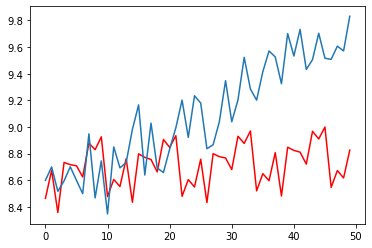

In [105]:
validate = pd.read_csv(r"validation_year.csv")
val = validate.values
plt.plot(predicted,color="red")
plt.plot(validate)

In [106]:
predicted = np.round_(predicted, decimals = 2)
predicted

array([8.46, 8.67, 8.36, 8.73, 8.72, 8.71, 8.62, 8.88, 8.83, 8.93, 8.48,
       8.61, 8.55, 8.76, 8.43, 8.8 , 8.77, 8.76, 8.66, 8.91, 8.85, 8.93,
       8.48, 8.6 , 8.55, 8.76, 8.43, 8.8 , 8.78, 8.77, 8.68, 8.93, 8.88,
       8.97, 8.52, 8.65, 8.6 , 8.81, 8.48, 8.85, 8.82, 8.81, 8.72, 8.97,
       8.91, 9.  , 8.55, 8.67, 8.62, 8.83])

In [134]:
years = np.array(series.index[-50:])
years = years.astype(np.str)
years

array(['1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'], dtype='<U21')

In [112]:
validation = validation.round(3)

In [124]:
val1 = np.array(validation.values)

In [131]:
pd1 = pd.DataFrame([])

In [135]:
pd1["year"] = years

In [136]:
pd1["real_temp"] = val1

In [138]:
pd1["predicted"] = predicted

In [140]:
pd1.to_csv(r'year_result.csv')